## 03 Preprocessing and Feature Engineering

In [1]:
#The imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
np.random.seed(42)

In [2]:
#loading the cleaned data
df = pd.read_csv('../data/final_work_data.csv')
pd.set_option('display.max_columns', 35)
df.shape

(3015, 28)

### Identification of the interaction columns worth including into the model

In [3]:
#identifying the interactions that are worth analyzing excluding the unrelated string columns
test = []
train = []
cross = []
neg = [-1, -.95, -.9, -.85, -.8, -.75, -.7, -.65, -.6, -.55, -.5, -.45, -.4, -.35, -.3, -.25, -.2, -.15, -.1, -.05]
pos = [1, .95, .9, .85, .8, .75, .7, .65, .6, .55, .5, .45, .4, .35, .3, .25, .2, .15, .1, .05]
#looping through correlations limits
for z in neg:
    for v in pos:
        interaction = []
        df1 = df.copy()
        df1 = df1.drop(columns=['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
        for i in list(df1.corr().columns):
            for j in list(df1.corr().index):
                if ((df1.corr().loc[j, i] < z  and df1.corr().loc[j, i] != -1) or (df1.corr().loc[j, i] > v and df1.corr().loc[j, i] != 1)) and j != i:
                        interaction.append((j, i))

        # creating the columns with identified interactions
        for a in interaction:
            df1[a[0]+'_'+a[1]] = df1[a[0]] * df1[a[1]]

        #saving the dataframe to feed into the model
        #df.to_csv('../data/final_preprocessed_data_with_polynomials.csv')

        X = df1#.drop(columns = ['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
        y = df['unemployment_rate_2010']

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

        ss = StandardScaler()
        Z_train = ss.fit_transform(X_train)
        Z_test = ss.transform(X_test)

        lr = LinearRegression()
        lr.fit(Z_train, y_train)
        if not lr.score(Z_test, y_test) < 0 and not cross_val_score(lr, Z_train, y_train).mean() < 0:
            test.append((z, v, lr.score(Z_train, y_train)))
            train.append((z, v, lr.score(Z_test, y_test)))
            cross.append((z, v, cross_val_score(lr, Z_train, y_train).mean()))
        print('z:' + str(z) + '; v:' + str(v) + "; train: " + str(lr.score(Z_train, y_train)) + "; test: " + str(lr.score(Z_test, y_test)) + "; cross: " + str(cross_val_score(lr, Z_train, y_train).mean()))

z:-1; v:1; train: 0.42994235461503605; test: 0.3938262913581446; cross: 0.3593874269646159
z:-1; v:0.95; train: 0.42994235461503605; test: 0.3938262913581446; cross: 0.3593874269646159
z:-1; v:0.9; train: 0.42994235461503605; test: 0.3938262913581446; cross: 0.3593874269646159
z:-1; v:0.85; train: 0.42994235461503605; test: 0.3938262913581446; cross: 0.3593874269646159
z:-1; v:0.8; train: 0.42994235461503605; test: 0.3938262913581446; cross: 0.3593874269646159
z:-1; v:0.75; train: 0.42994235461503605; test: 0.3938262913581446; cross: 0.3593874269646159
z:-1; v:0.7; train: 0.4299789991088153; test: 0.39358009541274763; cross: 0.3590585223670784
z:-1; v:0.65; train: 0.4299789991088153; test: 0.39358009541274763; cross: 0.3590585223670784
z:-1; v:0.6; train: 0.4319342767988221; test: 0.3921355753611976; cross: 0.35923422889529505
z:-1; v:0.55; train: 0.43210895678882166; test: 0.39260518223280416; cross: 0.3575033135596992
z:-1; v:0.5; train: 0.43217804840607066; test: 0.3919916466121697;

z:-0.8; v:0.65; train: 0.4437686300910324; test: 0.38293919917212127; cross: 0.37403014991529043
z:-0.8; v:0.6; train: 0.4440317713683968; test: 0.38294142589445757; cross: 0.3715936987077238
z:-0.8; v:0.55; train: 0.4445808004912831; test: 0.38398060891531505; cross: 0.3700983561003649
z:-0.8; v:0.5; train: 0.4447070543894016; test: 0.38297135290928686; cross: 0.36959800558084266
z:-0.8; v:0.45; train: 0.4505725263149508; test: 0.3843770069194701; cross: 0.3588738011503076
z:-0.8; v:0.4; train: 0.46187900385511627; test: 0.3768577613406294; cross: 0.2672631369286659
z:-0.8; v:0.35; train: 0.4880862146502344; test: 0.4068358589854717; cross: 0.12276040858101647
z:-0.8; v:0.3; train: 0.5116360002794338; test: 0.4318433657633748; cross: 0.11892993418124534
z:-0.8; v:0.25; train: 0.5397913008999362; test: 0.4694514112779694; cross: -58.32340237848554
z:-0.8; v:0.2; train: 0.5443894940025603; test: 0.4786812275438752; cross: -71.42427687650306
z:-0.8; v:0.15; train: 0.5546392634498891; tes

z:-0.6; v:0.35; train: 0.5040025335368086; test: 0.429495370135491; cross: 0.31870181620053295
z:-0.6; v:0.3; train: 0.5195075263090116; test: 0.44639263347753466; cross: 0.3005823124003973
z:-0.6; v:0.25; train: 0.5442521558940321; test: 0.47944051943437915; cross: -52.94912373918773
z:-0.6; v:0.2; train: 0.5473934485123394; test: 0.4863123936406988; cross: -67.31530165685764
z:-0.6; v:0.15; train: 0.5562993592023815; test: 0.49312830290393983; cross: -89.8606116672598
z:-0.6; v:0.1; train: 0.576959717910035; test: 0.5034110989951328; cross: -18.120431343463377
z:-0.6; v:0.05; train: 0.5893242296739251; test: 0.3068699519958016; cross: -3230714934653.995
z:-0.55; v:1; train: 0.46265444680224455; test: 0.4137369187893638; cross: 0.40337211779724164
z:-0.55; v:0.95; train: 0.46265444680224455; test: 0.4137369187893638; cross: 0.40337211779724164
z:-0.55; v:0.9; train: 0.46265444680224455; test: 0.4137369187893638; cross: 0.40337211779724164
z:-0.55; v:0.85; train: 0.46265444680224455; t

z:-0.4; v:0.05; train: 0.597878286912212; test: -13266974584.281105; cross: -131072418754698.83
z:-0.35; v:1; train: 0.4926983859821624; test: 0.44258509459202344; cross: 0.42239689094817967
z:-0.35; v:0.95; train: 0.4926983859821624; test: 0.44258509459202344; cross: 0.42239689094817967
z:-0.35; v:0.9; train: 0.4926983859821624; test: 0.44258509459202344; cross: 0.42239689094817967
z:-0.35; v:0.85; train: 0.4926983859821624; test: 0.44258509459202344; cross: 0.42239689094817967
z:-0.35; v:0.8; train: 0.4926983859821624; test: 0.44258509459202344; cross: 0.42239689094817967
z:-0.35; v:0.75; train: 0.4926983859821624; test: 0.44258509459202344; cross: 0.42239689094817967
z:-0.35; v:0.7; train: 0.4927031742063499; test: 0.44277668997551867; cross: 0.421877306980598
z:-0.35; v:0.65; train: 0.4927031742063499; test: 0.44277668997551867; cross: 0.421877306980598
z:-0.35; v:0.6; train: 0.4930605818816868; test: 0.4435098382908982; cross: 0.4206517865761558
z:-0.35; v:0.55; train: 0.496497266

z:-0.15; v:0.8; train: 0.5433112760992382; test: 0.48373703829662573; cross: 0.4512524971145314
z:-0.15; v:0.75; train: 0.5433112760992382; test: 0.48373703829662573; cross: 0.4512524971145314
z:-0.15; v:0.7; train: 0.5433207396674813; test: 0.48402130422667555; cross: 0.44690160641433574
z:-0.15; v:0.65; train: 0.5433207396674813; test: 0.48402130422667555; cross: 0.44690160641433574
z:-0.15; v:0.6; train: 0.5437837090649884; test: 0.484251680539323; cross: 0.447812678838231
z:-0.15; v:0.55; train: 0.5446148494317329; test: 0.4831126854613558; cross: 0.42994098290718397
z:-0.15; v:0.5; train: 0.5446979343384113; test: 0.4858588443545083; cross: 0.4260347156660691
z:-0.15; v:0.45; train: 0.5497109130512168; test: -1.1145722181296533; cross: -1000778544.2977607
z:-0.15; v:0.4; train: 0.5505001207496227; test: -19.523351572923044; cross: -127398947286098.5
z:-0.15; v:0.35; train: 0.5654479763151918; test: -738798811.8209043; cross: -1.8907917214060976e+16
z:-0.15; v:0.3; train: 0.5766470

In [4]:
maximum =-999

for num in train:
    if num[2] > maximum:
        maximum=num[2]
maximum
for num in train:
    if num[2]==maximum:
        print("train: " + str(num))
        for klm in test:
            if klm[0] == num[0] and klm[1] == num[1]:
                print("test: " + str(klm))
        for mmm in cross:
            if mmm[0] == num[0] and mmm[1] == num[1]:
                print("cross: " + str(mmm))

train: (-0.05, 0.5, 0.5035563125427125)
test: (-0.05, 0.5, 0.5976400477765338)
cross: (-0.05, 0.5, 0.3576937146264741)


In [5]:
maximum2 =-999

for num2 in test:
    if num2[2] > maximum2:
        maximum2=num2[2]
maximum2
for num2 in test:
    if num2[2]==maximum2:
        print("test: " + str(num2))
        for klm in train:
            if klm[0] == num2[0] and klm[1] == num2[1]:
                print("train: " + str(klm))
        for mmm in cross:
            if mmm[0] == num2[0] and mmm[1] == num2[1]:
                print("cross: " + str(mmm))

test: (-0.05, 0.6, 0.5978174607314768)
train: (-0.05, 0.6, 0.4992396356305018)
cross: (-0.05, 0.6, 0.3990344128487563)


In [6]:
maximum3 =-999

for num3 in cross:
    if num3[2] > maximum3:
        maximum3=num3[2]
maximum3
for num3 in cross:
    if num3[2]==maximum3:
        print("cross: " + str(num3))
        for klm in train:
            if klm[0] == num3[0] and klm[1] == num3[1]:
                print("train: " + str(klm))
        for mmm in test:
            if mmm[0] == num3[0] and mmm[1] == num3[1]:
                print("test: " + str(mmm))

cross: (-0.25, 1, 0.459808967231827)
train: (-0.25, 1, 0.47068363481578)
test: (-0.25, 1, 0.5369076291016095)
cross: (-0.25, 0.95, 0.459808967231827)
train: (-0.25, 0.95, 0.47068363481578)
test: (-0.25, 0.95, 0.5369076291016095)
cross: (-0.25, 0.9, 0.459808967231827)
train: (-0.25, 0.9, 0.47068363481578)
test: (-0.25, 0.9, 0.5369076291016095)
cross: (-0.25, 0.85, 0.459808967231827)
train: (-0.25, 0.85, 0.47068363481578)
test: (-0.25, 0.85, 0.5369076291016095)
cross: (-0.25, 0.8, 0.459808967231827)
train: (-0.25, 0.8, 0.47068363481578)
test: (-0.25, 0.8, 0.5369076291016095)
cross: (-0.25, 0.75, 0.459808967231827)
train: (-0.25, 0.75, 0.47068363481578)
test: (-0.25, 0.75, 0.5369076291016095)


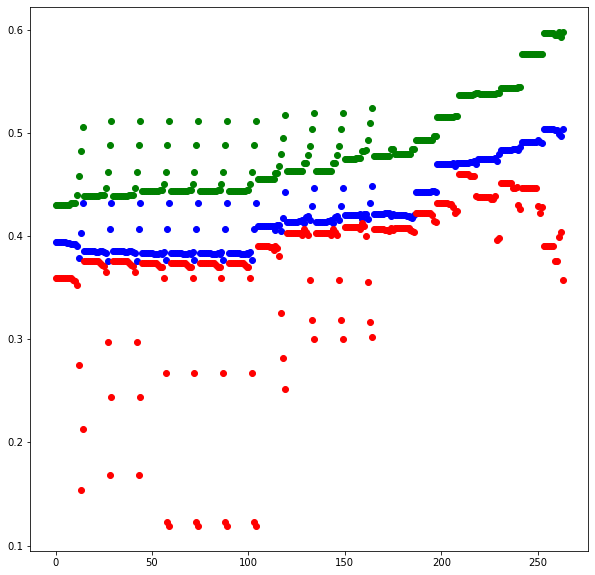

In [7]:
plt.figure(figsize=(10,10))
for i in range(len(test)):
    plt.scatter(i, train[i][2], color='blue')
    plt.scatter(i, test[i][2], color='green')
    plt.scatter(i, cross[i][2], color='red')

In [12]:
#identifying the index with the maximum sum of train, test and cross_val scores
maxim = -999
ma = 0
list_max = []
for i in range(len(test)):
    if (test[i][2] + train[i][2] + cross[i][2]) > maxim:
        maxim=(test[i][2] + train[i][2] + cross[i][2])
for i in range(len(test)):
    if (test[i][2] + train[i][2] + cross[i][2]) == maxim:
        list_max.append(i)
        

In [13]:
for i in list_max:
    print(train[i], test[i], cross[i])

(-0.1, 1, 0.4909139013993603) (-0.1, 1, 0.5761889446618838) (-0.1, 1, 0.4468579719604803)
(-0.1, 0.95, 0.4909139013993603) (-0.1, 0.95, 0.5761889446618838) (-0.1, 0.95, 0.4468579719604803)
(-0.1, 0.9, 0.4909139013993603) (-0.1, 0.9, 0.5761889446618838) (-0.1, 0.9, 0.4468579719604803)
(-0.1, 0.85, 0.4909139013993603) (-0.1, 0.85, 0.5761889446618838) (-0.1, 0.85, 0.4468579719604803)
(-0.1, 0.8, 0.4909139013993603) (-0.1, 0.8, 0.5761889446618838) (-0.1, 0.8, 0.4468579719604803)
(-0.1, 0.75, 0.4909139013993603) (-0.1, 0.75, 0.5761889446618838) (-0.1, 0.75, 0.4468579719604803)


In [15]:
#-0.25, 0.75
df = pd.read_csv('../data/final_work_data.csv')
interaction2 = []
df2 = df.copy()
df2 = df2.drop(columns=['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
for i in list(df2.corr().columns):
    for j in list(df2.corr().index):
        if ((df2.corr().loc[j, i] < -.25  and df2.corr().loc[j, i] != -1) or (df2.corr().loc[j, i] > .75 and df2.corr().loc[j, i] != 1)) and j != i:
            interaction2.append((j, i))

# creating the columns with identified interactions
for a in interaction2:
    df[a[0]+'_'+a[1]] = df[a[0]] * df[a[1]]

#exporting the dataframe with optimal features for modelling
df.to_csv('../data/full_data_interaction_025_075.csv')

## TEST AREA! ENTER AT YOUR OWN RISK!

In [4]:
"""
Testing various combinations of the cutoff correlation scores, as we have some time

we have identified that we were limiting the search area by expandinging it towards zero
|<--->|                                                                    |<--->|
|<------>|                                                              |<------>|
|<--------->|                                                        |<--------->|
||======================================||======================================||
-1                                       0                                       1

The next one is teting the cutoff correlations by shrinking on the inside towards the zero


|<------------------------------------->||<------------------------------------->|
  |<----------------------------------->||<----------------------------------->|
    |<--------------------------------->||<--------------------------------->|
||======================================||======================================||
-1                                       0                                       1

And the last one will be on having various correlation cutoff combinations
|<----->|                                 |<--------->|
            |<-------->|                             |<---->|
    |<------>|                                                 |<-------->|
||======================================||======================================||
-1                                       0                                       1
"""

'\nTesting various combinations of the cutoff correlation scores, as we have some time\n\nwe have identified that we were limiting the search area by expandinging it towards zero\n|<--->|                                                                    |<--->|\n|<------>|                                                              |<------>|\n|<--------->|                                                        |<--------->|\n||======================================||======================================||\n-1                                       0                                       1\n\nThe next one is teting the cutoff correlations by shrinking on the inside towards the zero\n\n\n|<------------------------------------->||<------------------------------------->|\n  |<----------------------------------->||<----------------------------------->|\n    |<--------------------------------->||<--------------------------------->|\n||======================================||==============

In [3]:
#identifying the interactions that are worth analyzing excluding the unrelated string columns
test = []
train = []
cross = []
neg = [-1, -.95, -.9, -.85, -.8, -.75, -.7, -.65, -.6, -.55, -.5, -.45, -.4, -.35, -.3, -.25, -.2, -.15, -.1, -.05]
pos = [1, .95, .9, .85, .8, .75, .7, .65, .6, .55, .5, .45, .4, .35, .3, .25, .2, .15, .1, .05]
#looping through correlations limits
for z in neg:
    for v in pos:
        interaction = []
        df1 = df.copy()
        df1 = df1.drop(columns=['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
        for i in list(df1.corr().columns):
            for j in list(df1.corr().index):
                if ((df1.corr().loc[j, i] != -1 and df1.corr().loc[j, i] > z and df1.corr().loc[j, i]< 0) or (df1.corr().loc[j, i] > 0 and df1.corr().loc[j, i] < v and df1.corr().loc[j, i] != 1)) and j != i:
                        interaction.append((j, i))

        # creating the columns with identified interactions
        for a in interaction:
            df1[a[0]+'_'+a[1]] = df1[a[0]] * df1[a[1]]

        #saving the dataframe to feed into the model
        #df.to_csv('../data/final_preprocessed_data_with_polynomials.csv')

        X = df1#.drop(columns = ['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
        y = df['unemployment_rate_2010']

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

        ss = StandardScaler()
        Z_train = ss.fit_transform(X_train)
        Z_test = ss.transform(X_test)

        lr = LinearRegression()
        lr.fit(Z_train, y_train)
        if not lr.score(Z_test, y_test) < 0 and not cross_val_score(lr, Z_train, y_train).mean() < 0:
            test.append((z, v, lr.score(Z_train, y_train)))
            train.append((z, v, lr.score(Z_test, y_test)))
            cross.append((z, v, cross_val_score(lr, Z_train, y_train).mean()))
        print('z:' + str(z) + '; v:' + str(v) + "; train: " + str(lr.score(Z_train, y_train)) + "; test: " + str(lr.score(Z_test, y_test)) + "; cross: " + str(cross_val_score(lr, Z_train, y_train).mean()))

z:-1; v:1; train: 0.6827740786747973; test: -4.951957674274056e+21; cross: -1.7570411512476217e+19
z:-1; v:0.95; train: 0.6827740786747973; test: -4.951957674274056e+21; cross: -1.7570411512476217e+19
z:-1; v:0.9; train: 0.6827740786747973; test: -4.951957674274056e+21; cross: -1.7570411512476217e+19
z:-1; v:0.85; train: 0.6827740786747973; test: -4.951957674274056e+21; cross: -1.7570411512476217e+19
z:-1; v:0.8; train: 0.6827740786747973; test: -4.951957674274056e+21; cross: -1.7570411512476217e+19
z:-1; v:0.75; train: 0.6827740786747973; test: -4.951957674274056e+21; cross: -1.7570411512476217e+19
z:-1; v:0.7; train: 0.6827740786747973; test: -4.951957674274056e+21; cross: -1.7570411512476217e+19
z:-1; v:0.65; train: 0.6827740786747973; test: -4.951957674274056e+21; cross: -1.7570411512476217e+19
z:-1; v:0.6; train: 0.6826095651172681; test: -1.20371329119685e+21; cross: -1.2882671827697394e+20
z:-1; v:0.55; train: 0.6823730539698477; test: -8.434154604712869e+20; cross: -7.766877340

z:-0.8; v:1; train: 0.6806990473827557; test: -2.1463501873799965e+21; cross: -4.6133230521014895e+19
z:-0.8; v:0.95; train: 0.6806990473827557; test: -2.1463501873799965e+21; cross: -4.6133230521014895e+19
z:-0.8; v:0.9; train: 0.6806990473827557; test: -2.1463501873799965e+21; cross: -4.6133230521014895e+19
z:-0.8; v:0.85; train: 0.6806990473827557; test: -2.1463501873799965e+21; cross: -4.6133230521014895e+19
z:-0.8; v:0.8; train: 0.6806990473827557; test: -2.1463501873799965e+21; cross: -4.6133230521014895e+19
z:-0.8; v:0.75; train: 0.6806990473827557; test: -2.1463501873799965e+21; cross: -4.6133230521014895e+19
z:-0.8; v:0.7; train: 0.6806990473827557; test: -2.1463501873799965e+21; cross: -4.6133230521014895e+19
z:-0.8; v:0.65; train: 0.6806990473827557; test: -2.1463501873799965e+21; cross: -4.6133230521014895e+19
z:-0.8; v:0.6; train: 0.6804541168440609; test: -2.94253019542704e+21; cross: -4.0673461997853245e+19
z:-0.8; v:0.55; train: 0.6801935328692564; test: -3.174132180564

z:-0.6; v:1; train: 0.6794041289225603; test: -1.1043131057715296e+21; cross: -5.605752704501653e+19
z:-0.6; v:0.95; train: 0.6794041289225603; test: -1.1043131057715296e+21; cross: -5.605752704501653e+19
z:-0.6; v:0.9; train: 0.6794041289225603; test: -1.1043131057715296e+21; cross: -5.605752704501653e+19
z:-0.6; v:0.85; train: 0.6794041289225603; test: -1.1043131057715296e+21; cross: -5.605752704501653e+19
z:-0.6; v:0.8; train: 0.6794041289225603; test: -1.1043131057715296e+21; cross: -5.605752704501653e+19
z:-0.6; v:0.75; train: 0.6794041289225603; test: -1.1043131057715296e+21; cross: -5.605752704501653e+19
z:-0.6; v:0.7; train: 0.6794041289225603; test: -1.1043131057715296e+21; cross: -5.605752704501653e+19
z:-0.6; v:0.65; train: 0.6794041289225603; test: -1.1043131057715296e+21; cross: -5.605752704501653e+19
z:-0.6; v:0.6; train: 0.6785094953837816; test: -4.743562696414206e+20; cross: -4.66277457907778e+19
z:-0.6; v:0.55; train: 0.6782817147350713; test: -1.873429759759007e+21; 

z:-0.4; v:1; train: 0.6763719302606186; test: -5.629894732044067e+21; cross: -4.494513041368516e+18
z:-0.4; v:0.95; train: 0.6763719302606186; test: -5.629894732044067e+21; cross: -4.494513041368516e+18
z:-0.4; v:0.9; train: 0.6763719302606186; test: -5.629894732044067e+21; cross: -4.494513041368516e+18
z:-0.4; v:0.85; train: 0.6763719302606186; test: -5.629894732044067e+21; cross: -4.494513041368516e+18
z:-0.4; v:0.8; train: 0.6763719302606186; test: -5.629894732044067e+21; cross: -4.494513041368516e+18
z:-0.4; v:0.75; train: 0.6763719302606186; test: -5.629894732044067e+21; cross: -4.494513041368516e+18
z:-0.4; v:0.7; train: 0.6763719302606186; test: -5.629894732044067e+21; cross: -4.494513041368516e+18
z:-0.4; v:0.65; train: 0.6763719302606186; test: -5.629894732044067e+21; cross: -4.494513041368516e+18
z:-0.4; v:0.6; train: 0.6738733694393464; test: -4.471601636169377e+21; cross: -1.7540030619007783e+19
z:-0.4; v:0.55; train: 0.6735994243741109; test: -4.4983890363946883e+21; cross

z:-0.2; v:1; train: 0.6714991247793552; test: -3.0063109242127668e+22; cross: -3.2355943065071567e+22
z:-0.2; v:0.95; train: 0.6714991247793552; test: -3.0063109242127668e+22; cross: -3.2355943065071567e+22
z:-0.2; v:0.9; train: 0.6714991247793552; test: -3.0063109242127668e+22; cross: -3.2355943065071567e+22
z:-0.2; v:0.85; train: 0.6714991247793552; test: -3.0063109242127668e+22; cross: -3.2355943065071567e+22
z:-0.2; v:0.8; train: 0.6714991247793552; test: -3.0063109242127668e+22; cross: -3.2355943065071567e+22
z:-0.2; v:0.75; train: 0.6714991247793552; test: -3.0063109242127668e+22; cross: -3.2355943065071567e+22
z:-0.2; v:0.7; train: 0.6714991247793552; test: -3.0063109242127668e+22; cross: -3.2355943065071567e+22
z:-0.2; v:0.65; train: 0.6714991247793552; test: -3.0063109242127668e+22; cross: -3.2355943065071567e+22
z:-0.2; v:0.6; train: 0.6651882167595542; test: -1.2508161099093923e+22; cross: -2.2285430361332092e+22
z:-0.2; v:0.55; train: 0.6647836367915256; test: -2.7597492814

In [10]:
maxim = -999
ma = 0
for i in range(len(test)):
    if (test[i][2] + train[i][2] + cross[i][2]) > maxim:
        maxim=(test[i][2] + train[i][2] + cross[i][2])
for i in range(len(test)):
    if (test[i][2] + train[i][2] + cross[i][2]) == maxim:
        print(ma)
        ma = i
print(ma)
#train[ma], test[ma], cross[ma]

0


This probably did not yeild any feasable results.

In [13]:
a = [1, .95, .9, .85, .8, .75, .7, .65, .6, .55, .5, .45, .4, .35, .3, .25, .2, .15, .1, .05]
b = sorted(a)
print(b)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]


In [17]:
#identifying the interactions that are worth analyzing excluding the unrelated string columns
test = []
train = []
cross = []
neg = [-1, -.95, -.9, -.85, -.8, -.75, -.7, -.65, -.6, -.55, -.5, -.45, -.4, -.35, -.3, -.25, -.2, -.15, -.1, -.05]
pos = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

corr_list = []
for z in neg:
    for v in pos:
        for g in neg:
            for h in pos:
                corr_list.append([z, g, v, h])

In [18]:
#looping through correlations limits
def modelling(cor):
    z, g, v, h = cor
    interaction = []
    df1 = df.copy()
    df1 = df1.drop(columns=['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
    for i in list(df1.corr().columns):
        for j in list(df1.corr().index):
            if ((df1.corr().loc[j, i] != -1
                 and df1.corr().loc[j, i]> z 
                 and df1.corr().loc[i,j] < g)
                 or (df1.corr().loc[j, i] != 1
                 and df1.corr().loc[j, i] > h
                 and df1.corr().loc[j, i] < v)) and j != i:
                    interaction.append((j, i))

    # creating the columns with identified interactions
    for a in interaction:
        df1[a[0]+'_'+a[1]] = df1[a[0]] * df1[a[1]]

    #saving the dataframe to feed into the model
    #df.to_csv('../data/final_preprocessed_data_with_polynomials.csv')

    X = df1#.drop(columns = ['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
    y = df['unemployment_rate_2010']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    ss = StandardScaler()
    Z_train = ss.fit_transform(X_train)
    Z_test = ss.transform(X_test)

    lr = LinearRegression()
    lr.fit(Z_train, y_train)
    if not lr.score(Z_test, y_test) < 0 and not cross_val_score(lr, Z_train, y_train).mean() < 0:
        test.append((z, v, lr.score(Z_train, y_train)))
        train.append((z, v, lr.score(Z_test, y_test)))
        cross.append((z, v, cross_val_score(lr, Z_train, y_train).mean()))
    return ('from z:' + str(z) + ' to g:' + str(g) + '; from h:' + str(h)  + ' to v:' + str(v) + "; train: " + str(lr.score(Z_train, y_train)) + "; test: " + str(lr.score(Z_test, y_test)) + "; cross: " + str(cross_val_score(lr, Z_train, y_train).mean()))

In [19]:
               
def fast_model(cor): #the speed up func (multiprocessing)
    print(modelling(cor))

In [ ]:
   
with Pool(20) as p: #multiprocessing start
    p.map(fast_model, (corr_list))